<a href="https://colab.research.google.com/github/omanshuthapliyal/ML2Coursework/blob/master/minst_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import necessary packages
from IPython.display import clear_output
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from time import sleep
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


# Load Data

In [0]:
#Load MNIST data and normalize to [-1, 1]
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
data_train = 2*(data_train/255.0 - 0.5)
data_test = 2*(data_test/255.0 - 0.5)
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)
#Reshape training and testing data into 784-dimensional vectors
try:
  d = data_train.shape[1]
  data_train = data_train.reshape((data_train.shape[0], 
                                  d*d))
  data_test = data_test.reshape((data_test.shape[0], 
                               d*d))
except:
  print("training data shape: ", data_train.shape)
  print("testing data shape: ", data_test.shape)
  print("Data was reshaped already")

nClasses = 10

# Creating CNN Model

In [0]:
def nnModel():
  model = Sequential()
  model.add(Dense(35,input_dim=data_test.shape[1],
                activation="relu") )
  model.add(Dense(45, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(60, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(30, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(60, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(50, activation="relu",
                  kernel_initializer = "uniform") )
  model.add(Dense(30, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(65, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(25, activation="relu", 
                  kernel_initializer = "uniform") )
  model.add(Dense(nClasses, activation = 'softmax'))  
  return model

## Callback for grabbing outputs from each layer

In [0]:
def activationPlotter(layer_outs, ax):
  ax.clear()
  layerNum = 0
  for layers in layer_outs:
    layerLength = layers.shape[1]
    y_vec = np.arange(0, layerLength, 1)
    y_vec = y_vec - layerLength/2
    y_vec = y_vec.reshape((1,layerLength))
    activeUnits = (layers > 0).sum()
    inativeUnits = layerLength - activeUnits
    x = np.repeat(layerNum, layerLength)
    x = x.reshape((1,layerLength))
    # clear_output()
    plt.scatter(x[layers <= 0],
                y_vec[layers <= 0], 
                s=35, facecolors='none', edgecolors='r')
    plt.scatter(x[layers > 0],
                y_vec[layers > 0], 
                s=35, facecolors='g', edgecolors='g')
    string = "%0.2f%%" %(100*activeUnits/layerLength)
    ax.text(x[0,0]-0.225, y_vec.max()+2, string, fontsize=15)
    layerNum += 1
  ax.set_facecolor('beige')
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  plt.show()
  sleep(1)

layerOutputs = list()

class grabsActivation(keras.callbacks.Callback):
  
  def on_epoch_end(self, batch, logs = None):

    inp = model.input                                           # input placeholder
    outputs = [layer.output for layer in model.layers]          # all layer outputs
    functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

    # Testing
    test = np.random.random(data_test.shape[1])[np.newaxis,...]
    layer_outs = functor([test, 1.])
    layerOutputs.append(layer_outs)
    

## Training model

In [0]:
model = nnModel()
model.compile(loss='categorical_crossentropy',
                  optimizer = "adam", 
                  metrics = ['accuracy'])
print(model.summary())

model_metaData = model.fit(data_train, labels_train,
                           validation_data = (data_test, labels_test), 
                           epochs = 100, batch_size = 512, 
                           shuffle = True, verbose=True, 
                           callbacks=[grabsActivation()])
scores = model.evaluate(data_test, labels_test)
print("Accuracy: %0.4f%%" %(scores[1]*100) )






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 35)                27475     
_________________________________________________________________
dense_2 (Dense)              (None, 45)                1620      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                2760      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_5 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_7 (Dense)              (None, 30)          

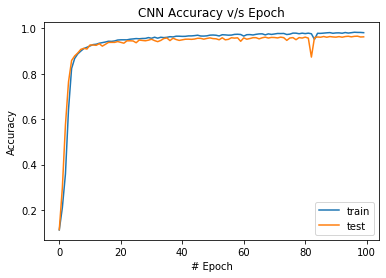

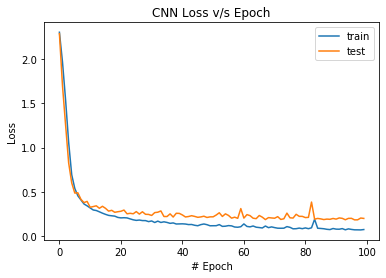

In [0]:
#Plot accuracy vs epoch
plt.plot(model_metaData.history['acc'])
plt.plot(model_metaData.history['val_acc'])
plt.title('CNN Accuracy v/s Epoch')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()
#Plot loss vs epoch
plt.plot(model_metaData.history['loss'])
plt.plot(model_metaData.history['val_loss'])
plt.title('CNN Loss v/s Epoch')
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

<Figure size 1440x1080 with 0 Axes>

Epoch number  1


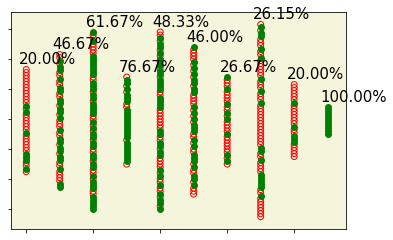

<Figure size 1440x1080 with 0 Axes>

Epoch number  2


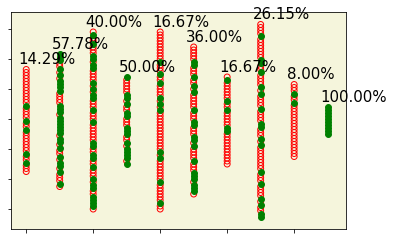

<Figure size 1440x1080 with 0 Axes>

Epoch number  3


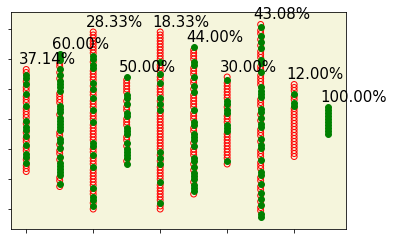

<Figure size 1440x1080 with 0 Axes>

Epoch number  4


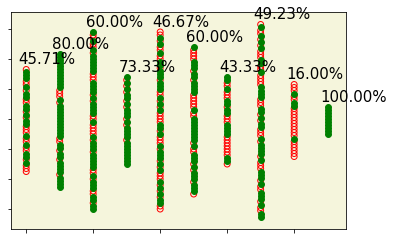

<Figure size 1440x1080 with 0 Axes>

Epoch number  5


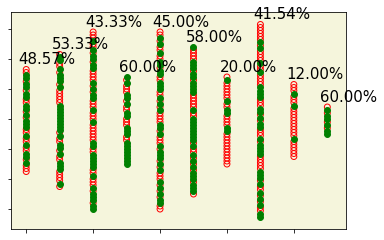

<Figure size 1440x1080 with 0 Axes>

Epoch number  6


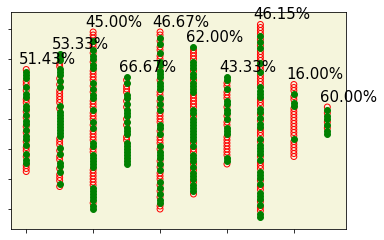

<Figure size 1440x1080 with 0 Axes>

Epoch number  7


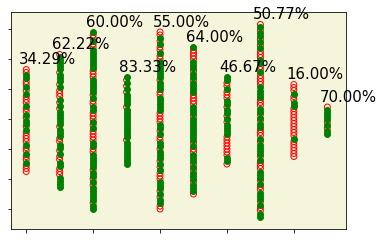

<Figure size 1440x1080 with 0 Axes>

Epoch number  8


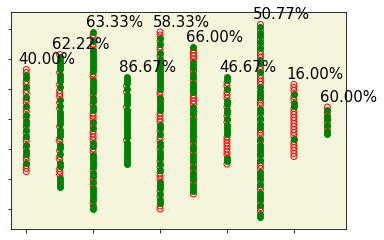

<Figure size 1440x1080 with 0 Axes>

Epoch number  9


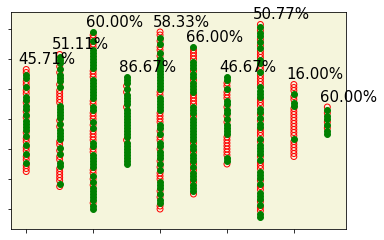

<Figure size 1440x1080 with 0 Axes>

Epoch number  10


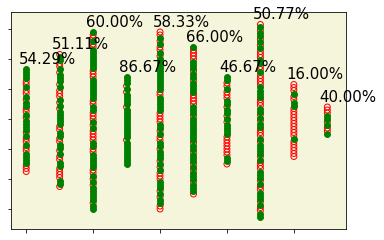

<Figure size 1440x1080 with 0 Axes>

Epoch number  11


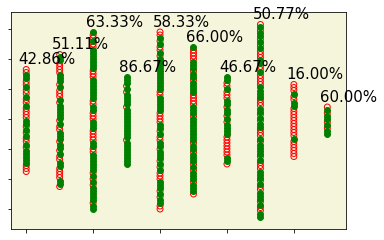

<Figure size 1440x1080 with 0 Axes>

Epoch number  12


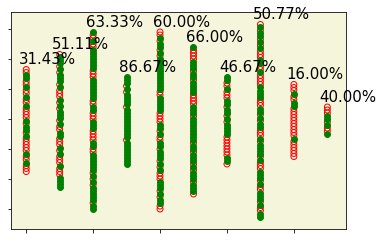

<Figure size 1440x1080 with 0 Axes>

Epoch number  13


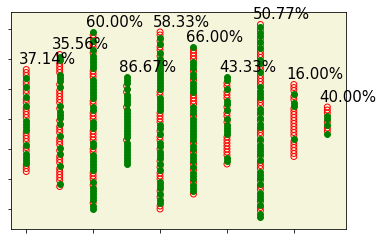

<Figure size 1440x1080 with 0 Axes>

Epoch number  14


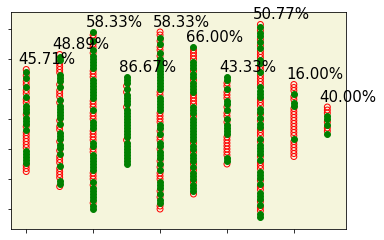

<Figure size 1440x1080 with 0 Axes>

Epoch number  15


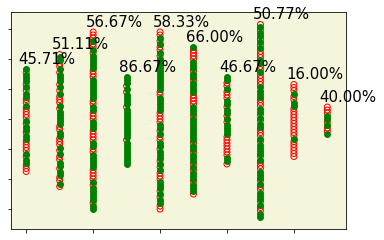

<Figure size 1440x1080 with 0 Axes>

Epoch number  16


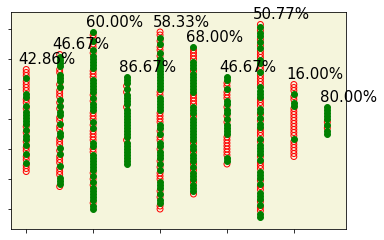

<Figure size 1440x1080 with 0 Axes>

Epoch number  17


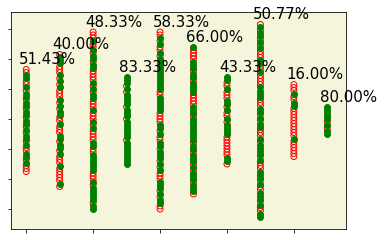

<Figure size 1440x1080 with 0 Axes>

Epoch number  18


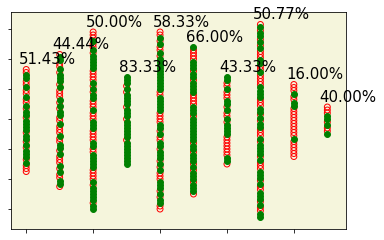

<Figure size 1440x1080 with 0 Axes>

Epoch number  19


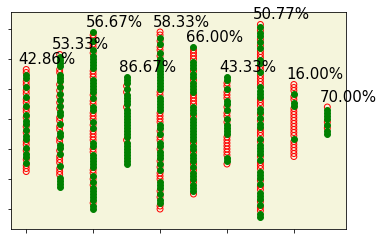

<Figure size 1440x1080 with 0 Axes>

Epoch number  20


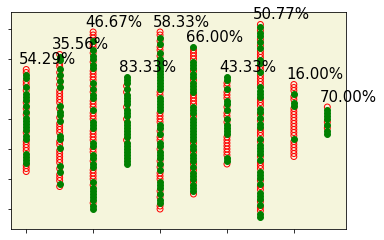

<Figure size 1440x1080 with 0 Axes>

Epoch number  21


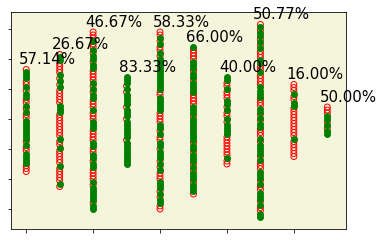

<Figure size 1440x1080 with 0 Axes>

Epoch number  22


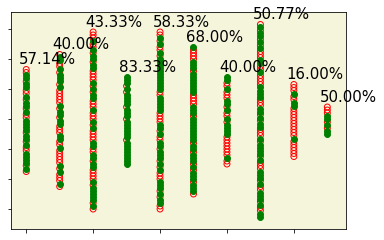

<Figure size 1440x1080 with 0 Axes>

Epoch number  23


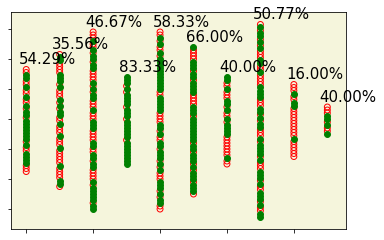

<Figure size 1440x1080 with 0 Axes>

Epoch number  24


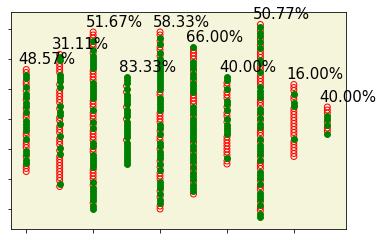

<Figure size 1440x1080 with 0 Axes>

Epoch number  25


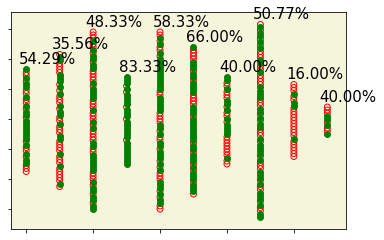

<Figure size 1440x1080 with 0 Axes>

Epoch number  26


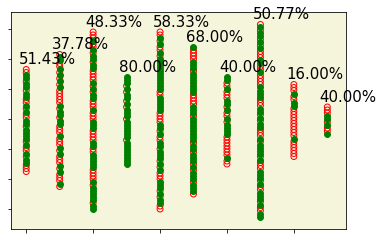

<Figure size 1440x1080 with 0 Axes>

Epoch number  27


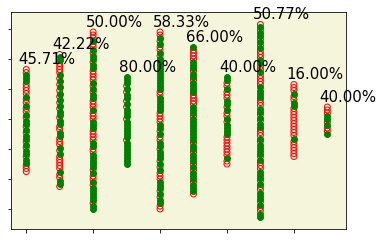

<Figure size 1440x1080 with 0 Axes>

Epoch number  28


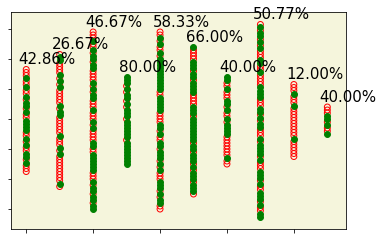

<Figure size 1440x1080 with 0 Axes>

Epoch number  29


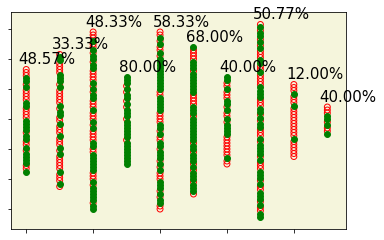

<Figure size 1440x1080 with 0 Axes>

Epoch number  30


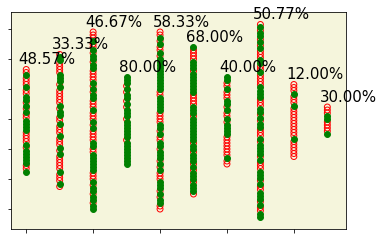

<Figure size 1440x1080 with 0 Axes>

Epoch number  31


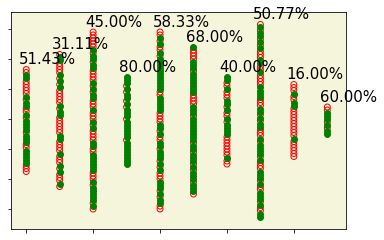

<Figure size 1440x1080 with 0 Axes>

Epoch number  32


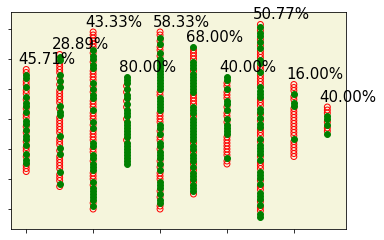

<Figure size 1440x1080 with 0 Axes>

Epoch number  33


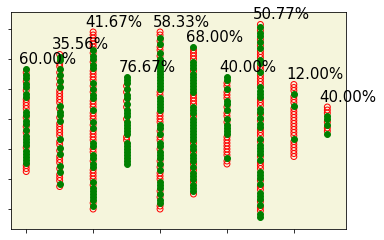

<Figure size 1440x1080 with 0 Axes>

Epoch number  34


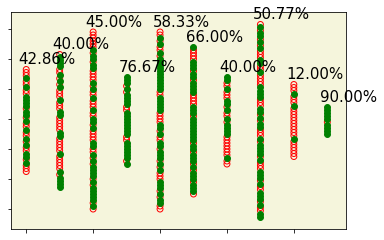

<Figure size 1440x1080 with 0 Axes>

Epoch number  35


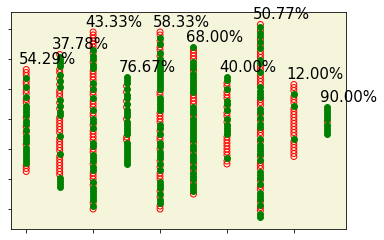

<Figure size 1440x1080 with 0 Axes>

Epoch number  36


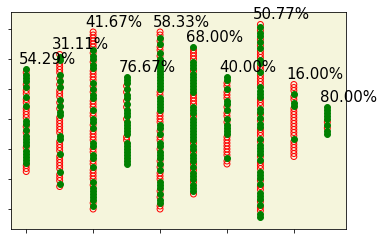

<Figure size 1440x1080 with 0 Axes>

Epoch number  37


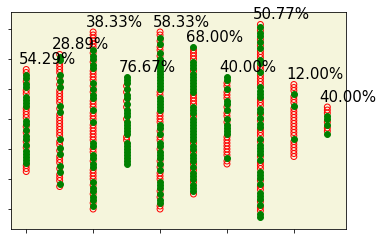

<Figure size 1440x1080 with 0 Axes>

Epoch number  38


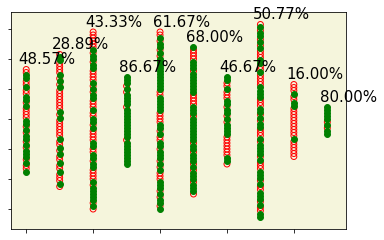

<Figure size 1440x1080 with 0 Axes>

Epoch number  39


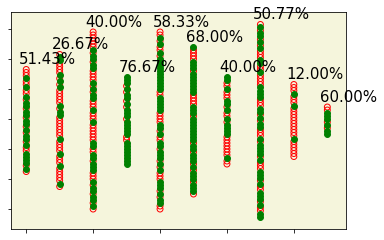

<Figure size 1440x1080 with 0 Axes>

Epoch number  40


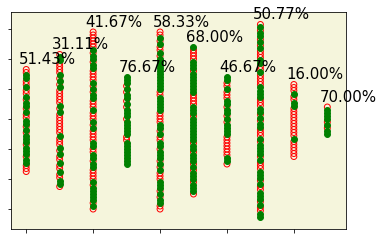

<Figure size 1440x1080 with 0 Axes>

Epoch number  41


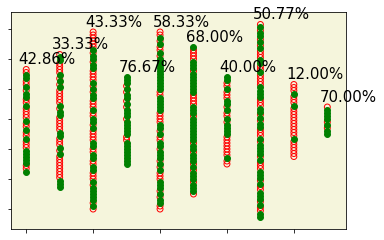

<Figure size 1440x1080 with 0 Axes>

Epoch number  42


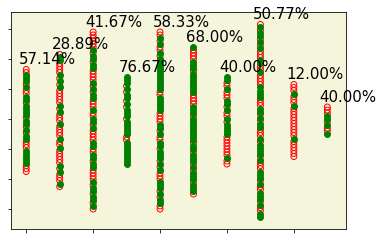

<Figure size 1440x1080 with 0 Axes>

Epoch number  43


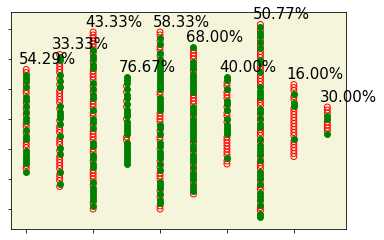

<Figure size 1440x1080 with 0 Axes>

Epoch number  44


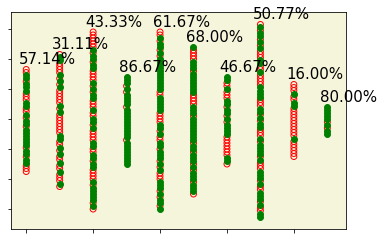

<Figure size 1440x1080 with 0 Axes>

Epoch number  45


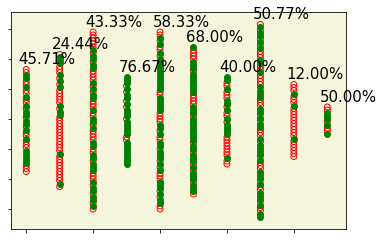

<Figure size 1440x1080 with 0 Axes>

Epoch number  46


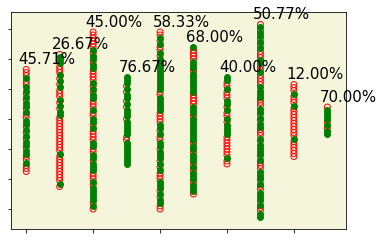

<Figure size 1440x1080 with 0 Axes>

Epoch number  47


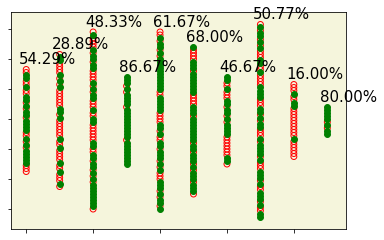

<Figure size 1440x1080 with 0 Axes>

Epoch number  48


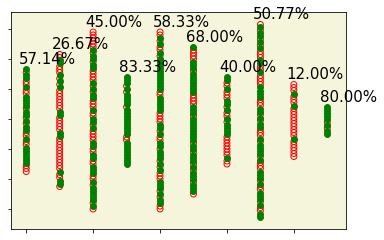

<Figure size 1440x1080 with 0 Axes>

Epoch number  49


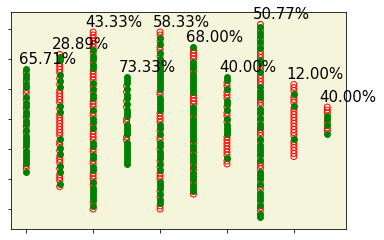

<Figure size 1440x1080 with 0 Axes>

Epoch number  50


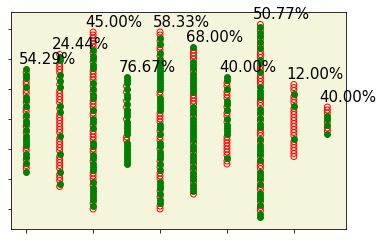

<Figure size 1440x1080 with 0 Axes>

Epoch number  51


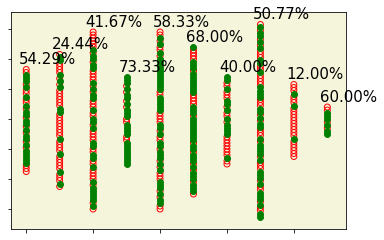

<Figure size 1440x1080 with 0 Axes>

Epoch number  52


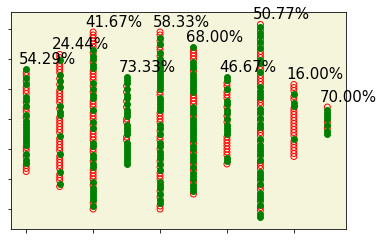

<Figure size 1440x1080 with 0 Axes>

Epoch number  53


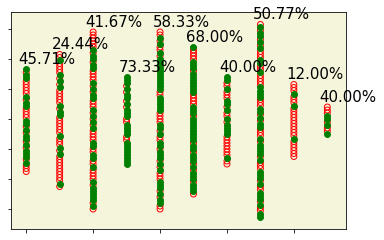

<Figure size 1440x1080 with 0 Axes>

Epoch number  54


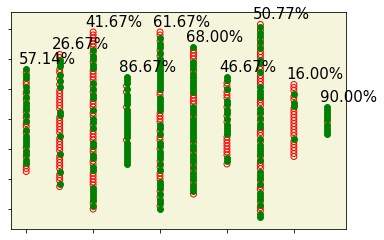

<Figure size 1440x1080 with 0 Axes>

Epoch number  55


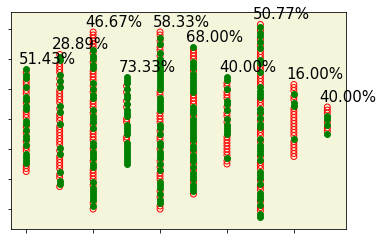

<Figure size 1440x1080 with 0 Axes>

Epoch number  56


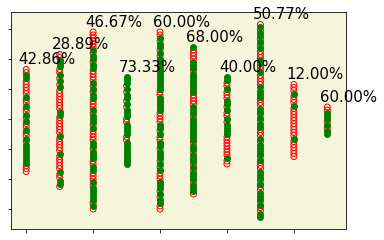

<Figure size 1440x1080 with 0 Axes>

Epoch number  57


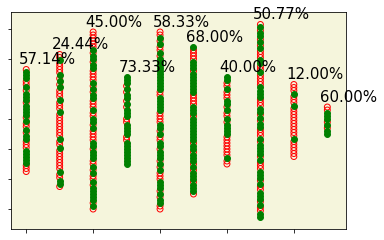

<Figure size 1440x1080 with 0 Axes>

Epoch number  58


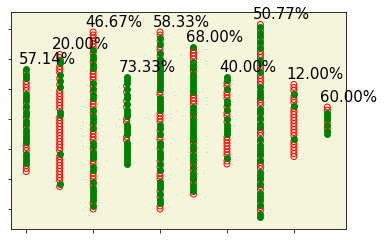

<Figure size 1440x1080 with 0 Axes>

Epoch number  59


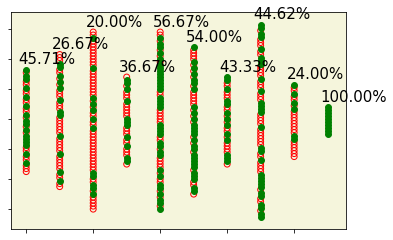

<Figure size 1440x1080 with 0 Axes>

Epoch number  60


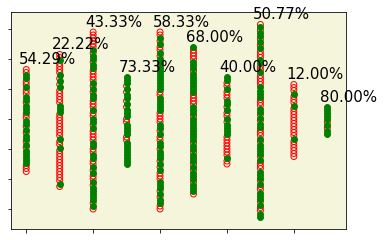

<Figure size 1440x1080 with 0 Axes>

Epoch number  61


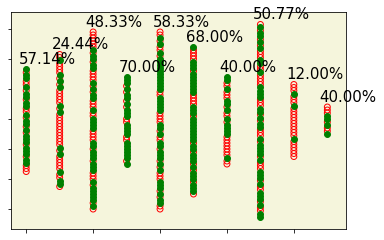

<Figure size 1440x1080 with 0 Axes>

Epoch number  62


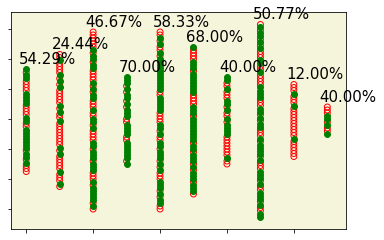

<Figure size 1440x1080 with 0 Axes>

Epoch number  63


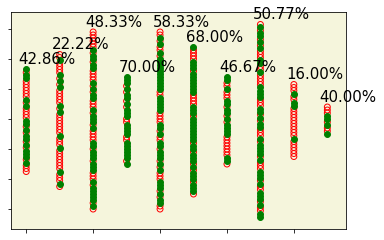

<Figure size 1440x1080 with 0 Axes>

Epoch number  64


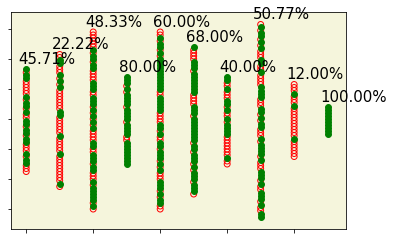

<Figure size 1440x1080 with 0 Axes>

Epoch number  65


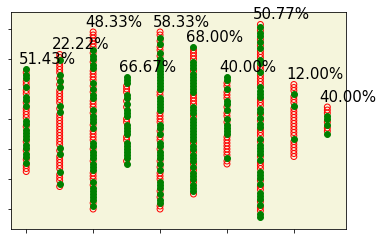

<Figure size 1440x1080 with 0 Axes>

Epoch number  66


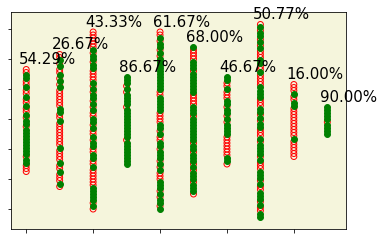

<Figure size 1440x1080 with 0 Axes>

Epoch number  67


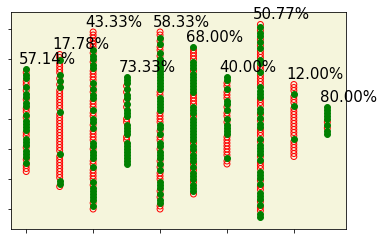

<Figure size 1440x1080 with 0 Axes>

Epoch number  68


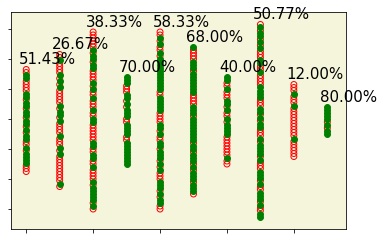

<Figure size 1440x1080 with 0 Axes>

Epoch number  69


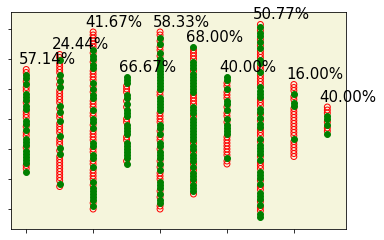

<Figure size 1440x1080 with 0 Axes>

Epoch number  70


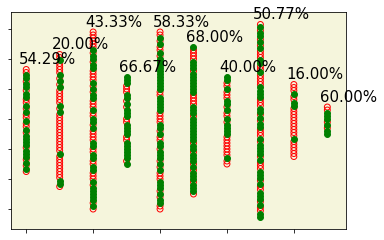

<Figure size 1440x1080 with 0 Axes>

Epoch number  71


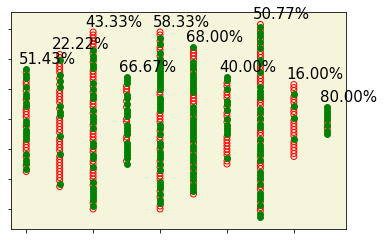

<Figure size 1440x1080 with 0 Axes>

Epoch number  72


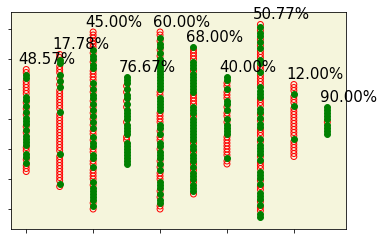

<Figure size 1440x1080 with 0 Axes>

Epoch number  73


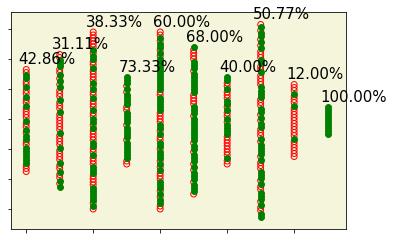

<Figure size 1440x1080 with 0 Axes>

Epoch number  74


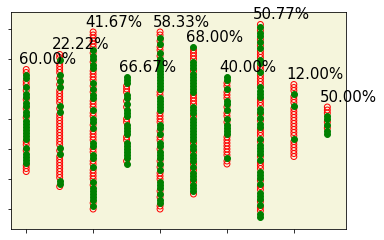

<Figure size 1440x1080 with 0 Axes>

Epoch number  75


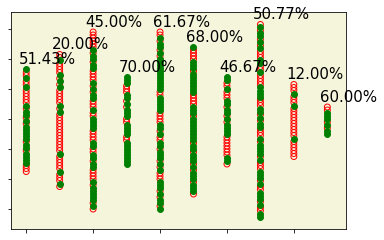

<Figure size 1440x1080 with 0 Axes>

Epoch number  76


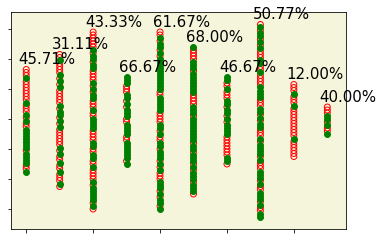

<Figure size 1440x1080 with 0 Axes>

Epoch number  77


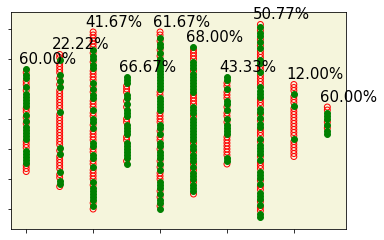

<Figure size 1440x1080 with 0 Axes>

Epoch number  78


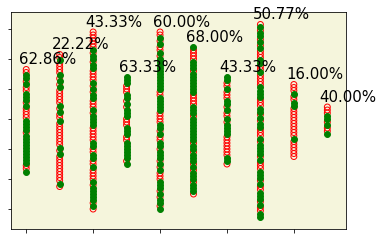

<Figure size 1440x1080 with 0 Axes>

Epoch number  79


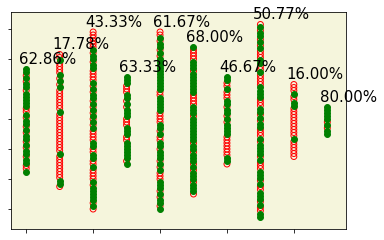

<Figure size 1440x1080 with 0 Axes>

Epoch number  80


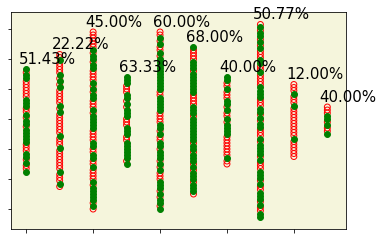

<Figure size 1440x1080 with 0 Axes>

Epoch number  81


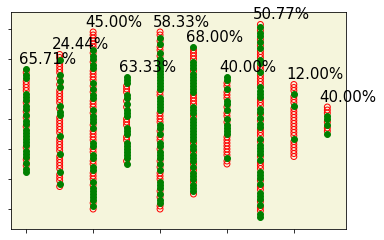

<Figure size 1440x1080 with 0 Axes>

Epoch number  82


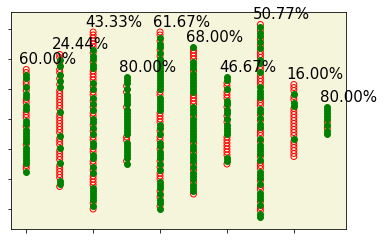

<Figure size 1440x1080 with 0 Axes>

Epoch number  83


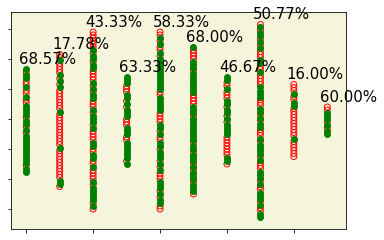

<Figure size 1440x1080 with 0 Axes>

Epoch number  84


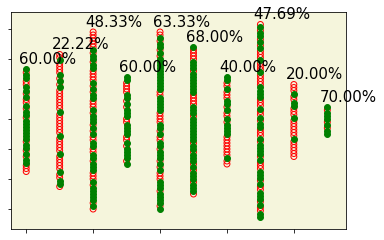

<Figure size 1440x1080 with 0 Axes>

Epoch number  85


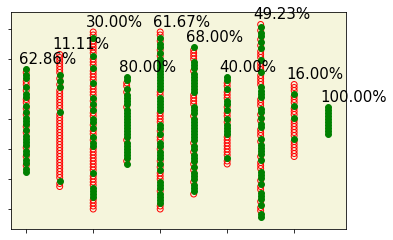

<Figure size 1440x1080 with 0 Axes>

Epoch number  86


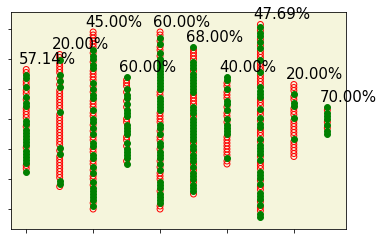

<Figure size 1440x1080 with 0 Axes>

Epoch number  87


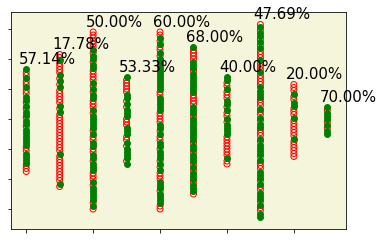

<Figure size 1440x1080 with 0 Axes>

Epoch number  88


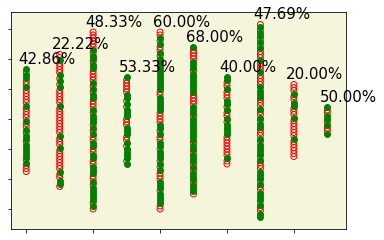

<Figure size 1440x1080 with 0 Axes>

Epoch number  89


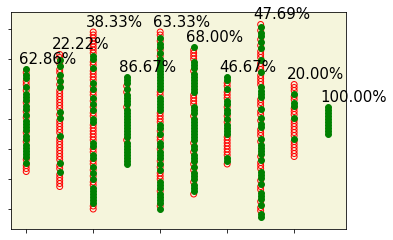

<Figure size 1440x1080 with 0 Axes>

Epoch number  90


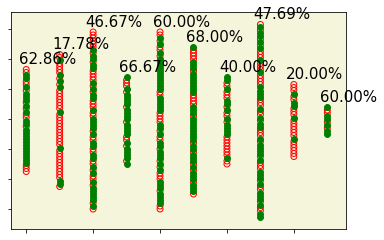

<Figure size 1440x1080 with 0 Axes>

Epoch number  91


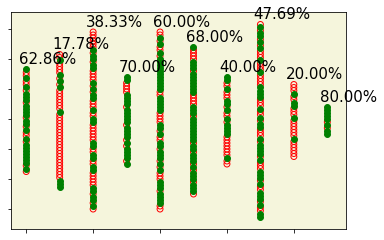

<Figure size 1440x1080 with 0 Axes>

Epoch number  92


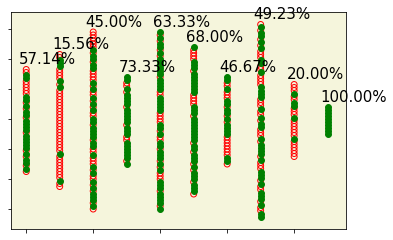

<Figure size 1440x1080 with 0 Axes>

Epoch number  93


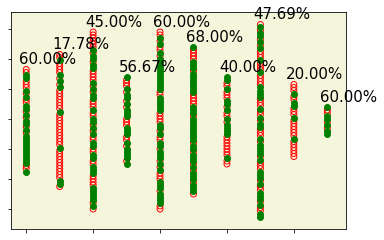

<Figure size 1440x1080 with 0 Axes>

Epoch number  94


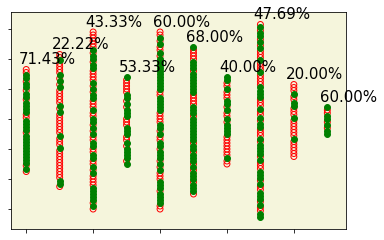

<Figure size 1440x1080 with 0 Axes>

Epoch number  95


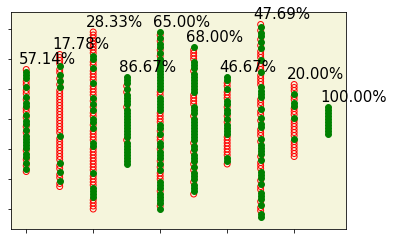

<Figure size 1440x1080 with 0 Axes>

Epoch number  96


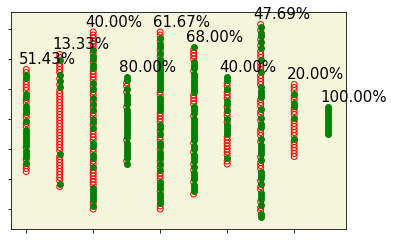

<Figure size 1440x1080 with 0 Axes>

Epoch number  97


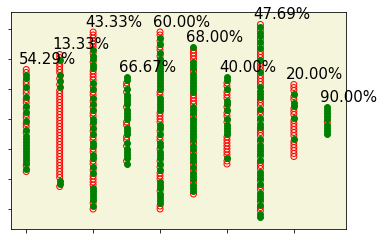

<Figure size 1440x1080 with 0 Axes>

Epoch number  98


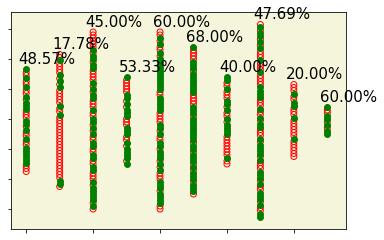

<Figure size 1440x1080 with 0 Axes>

Epoch number  99


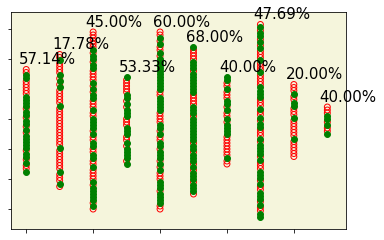

<Figure size 1440x1080 with 0 Axes>

Epoch number  100


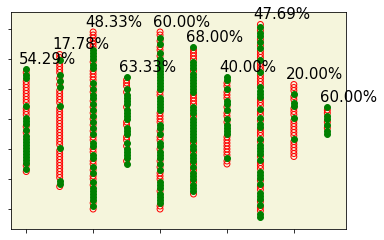

In [0]:

ctr = 0
for outputs in layerOutputs:
  ctr += 1
  fig = plt.figure(figsize=(20,15))
  plt.show()
  plt.title("Percentage of active units in the network", fontsize=30)
  axes = plt.gca()
  print("Epoch number ",str(ctr))
  activationPlotter(outputs, axes)